In [1]:
import ROOT
import my_library.common_analysis_tools as tools
import my_library.constants as constants
import my_library.kinematic_cuts as kcuts

Welcome to JupyROOT 6.24/04


In [2]:
ROOT.EnableImplicitMT()

In [3]:
df = tools.get_dataframe('pipkmks', 'spring', 'data', filtered=False)


In [4]:
df = df.Filter(kcuts.KINFIT_CL_CUT).Filter(kcuts.MX2_PPIPKMKS_CUT).Filter(kcuts.KS_PATHLENGTH_CUT).Filter(kcuts.KS_MASS_CUT).Filter(kcuts.PPIP_MASS_CUT).Filter(kcuts.P_P_CUT).Filter(kcuts.KSTAR_ALL_CUT_PIPKMKS)

In [5]:
df = df.Filter('kmp_m < 1.5')

In [6]:
hist = df.Histo1D(('ksp_m', 'M(pK_{s}) with M(pK^{-}) < 1.5 GeV', 300, 0.0, 3.0), 'ksp_m')

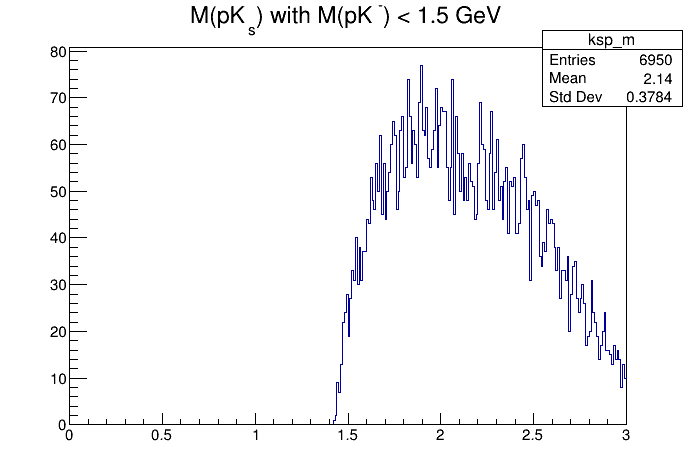

In [7]:
c = ROOT.TCanvas()
hist.Draw()
c.Draw()
